# Hotel Reservations Dataset


**Context**

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Training a model will help with -:


*   Cancellation Prediction
*   Operational Optimization
*   Revenue Management
*   Special Request Management

Here I will work on predicitng whether a booking is likely to be cancelled or not using various models.

**Step 1 - Understanding the dataset**

In [1]:
# Read the datset
import pandas as pd


df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
# Get number of instances and features
instances, features = df.shape

print(f"No. of Features: {features}")
print(f"No. of Instances: {instances}")

No. of Features: 19
No. of Instances: 36275


In [3]:
# Creating the feature dictionary for the feature descrition
feature_data = {
    'Feature Name': [
        'Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking',
        'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'booking_status'
    ],
    'Description': [
        'Unique identifier for each booking', 'Number of adults', 'Number of children',
        'Number of weekend nights (Sat/Sun)', 'Number of week nights (Mon-Fri)',
        'Type of meal plan booked', 'Whether a car parking space is required',
        'Type of room reserved', 'Days between booking and arrival',
        'Year of arrival date', 'Month of arrival date', 'Day of arrival date',
        'Market segment designation', 'Is the customer a repeated guest?',
        'Number of previous cancellations', 'Number of previous bookings not canceled',
        'Average price per day of the reservation', 'Total number of special requests',
        'Target: Whether the booking was canceled or not'
    ],
    'Type': [
        'Categorical (ID)', 'Numerical', 'Numerical', 'Numerical', 'Numerical',
        'Categorical', 'Binary', 'Categorical', 'Numerical', 'Numerical',
        'Numerical', 'Numerical', 'Categorical', 'Binary', 'Numerical',
        'Numerical', 'Numerical', 'Numerical', 'Categorical (Target)'
    ]
}

# Creating the DataFrame
description_df = pd.DataFrame(feature_data)
description_df

,Feature Name,Description,Type
0,Booking_ID,Unique identifier for each booking,Categorical (ID)
1,no_of_adults,Number of adults,Numerical
2,no_of_children,Number of children,Numerical
3,no_of_weekend_nights,Number of weekend nights (Sat/Sun),Numerical
4,no_of_week_nights,Number of week nights (Mon-Fri),Numerical
5,type_of_meal_plan,Type of meal plan booked,Categorical
6,required_car_parking,Whether a car parking space is required,Binary
7,room_type_reserved,Type of room reserved,Categorical
8,lead_time,Days between booking and arrival,Numerical
9,arrival_year,Year of arrival date,Numerical


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


**Step 2 - Data Cleaning**

In [5]:
# Summary of the actual dataset structure
info_dict = {
    "Total Rows": [df.shape[0]],
    "Total Columns": [df.shape[1]],
    "Null Values": [df.isnull().sum().sum()],
    "Duplicate Rows": [df.duplicated().sum()]
}

summary_df = pd.DataFrame(info_dict)
print("--- Dataset Integrity Summary ---\n")
print(summary_df)

--- Dataset Integrity Summary ---

   Total Rows  Total Columns  Null Values  Duplicate Rows
0       36275             19            0               0


In [6]:
# Drop Booking_ID as it is unique and provides no predictive power
df.drop('Booking_ID', axis=1, inplace=True)

**Step 3 - EDA**

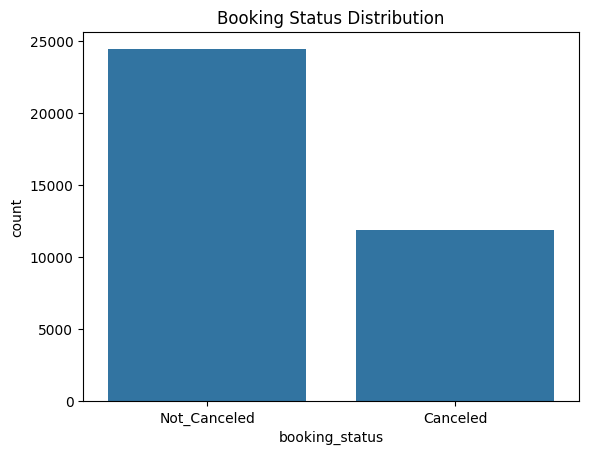

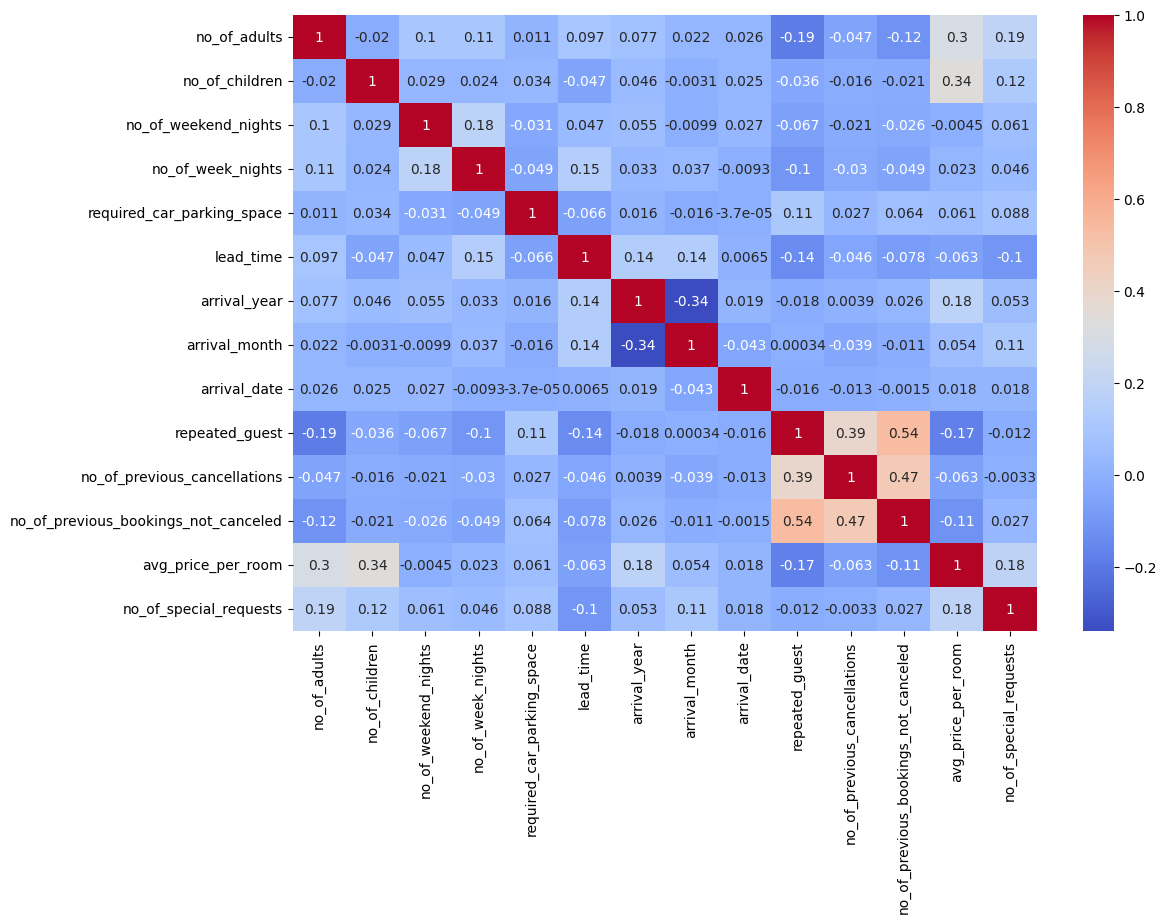

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# --- EDA ---
# Visualizing the target variable distribution
sns.countplot(x='booking_status', data=df)
plt.title('Booking Status Distribution')
plt.show()

# Correlation Heatmap (for numerical features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

/tmp/ipython-input-1518159803.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], x='booking_status', y='lead_time', data=df, palette='Set2')


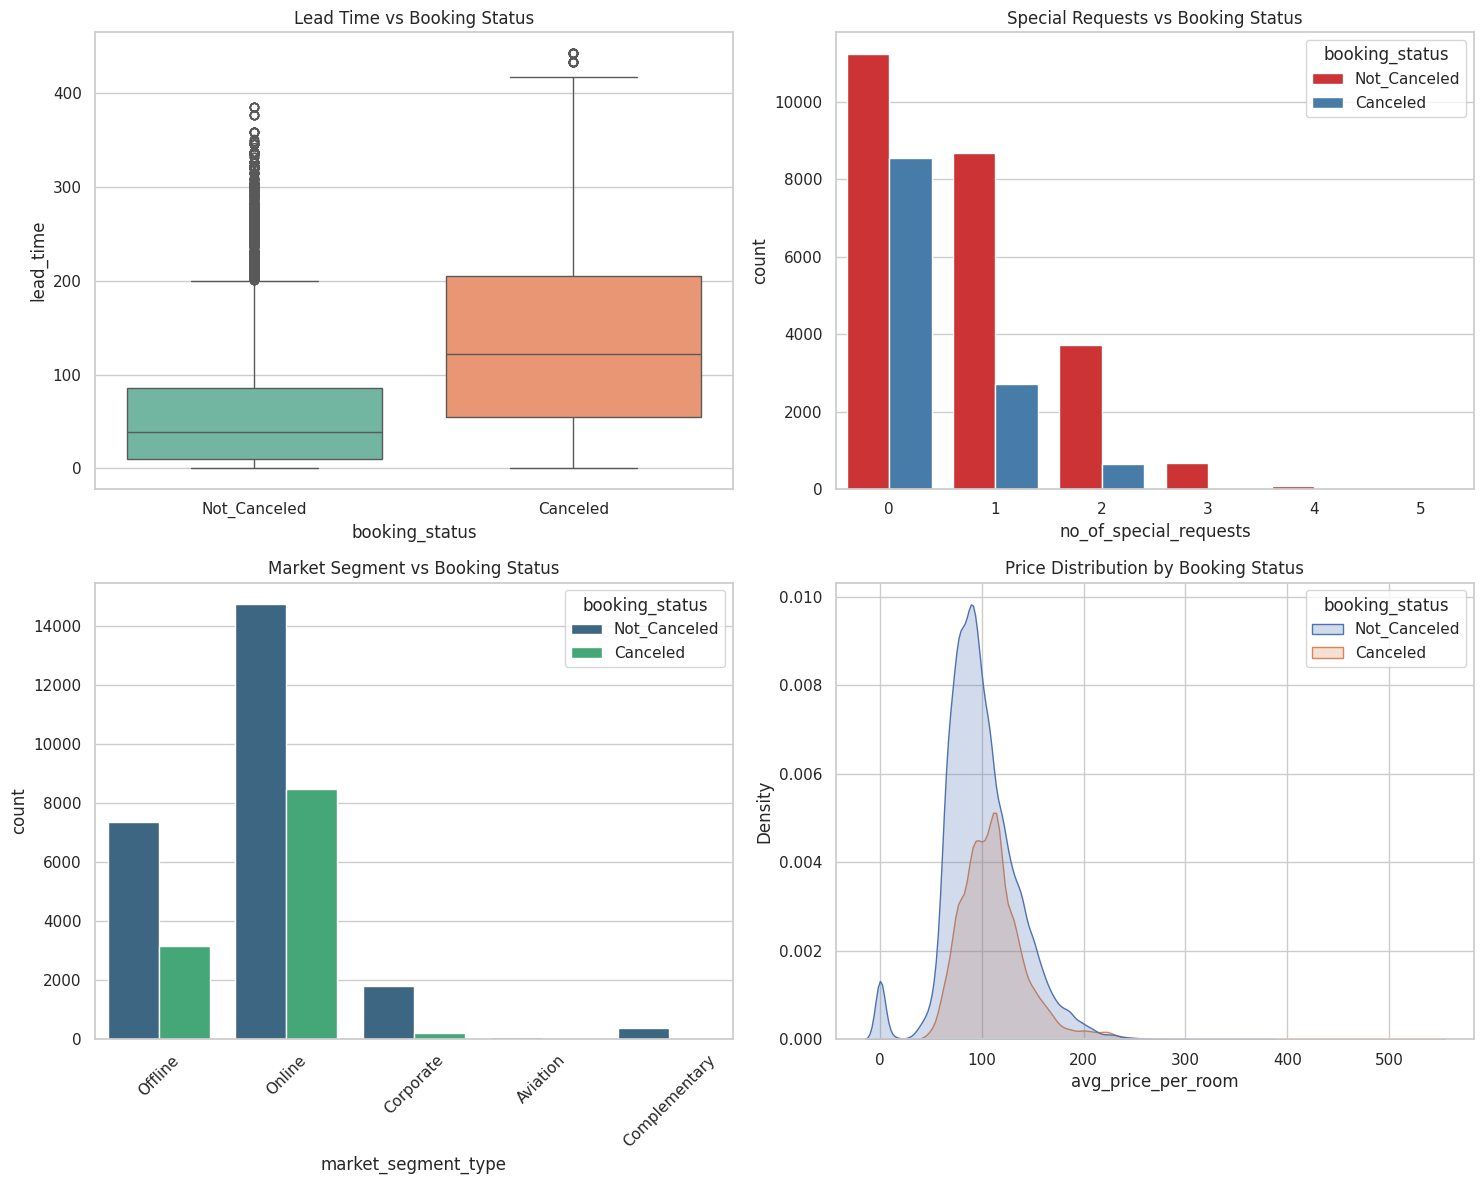

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Lead Time vs Booking Status (Boxplot)
sns.boxplot(ax=axes[0, 0], x='booking_status', y='lead_time', data=df, palette='Set2')
axes[0, 0].set_title('Lead Time vs Booking Status')

# 2. Special Requests vs Booking Status (Countplot)
sns.countplot(ax=axes[0, 1], x='no_of_special_requests', hue='booking_status', data=df, palette='Set1')
axes[0, 1].set_title('Special Requests vs Booking Status')

# 3. Market Segment vs Booking Status (Countplot)
sns.countplot(ax=axes[1, 0], x='market_segment_type', hue='booking_status', data=df, palette='viridis')
axes[1, 0].set_title('Market Segment vs Booking Status')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Average Price vs Booking Status (KDE Plot)
sns.kdeplot(ax=axes[1, 1], x='avg_price_per_room', hue='booking_status', data=df, fill=True)
axes[1, 1].set_title('Price Distribution by Booking Status')

plt.tight_layout()
plt.show()

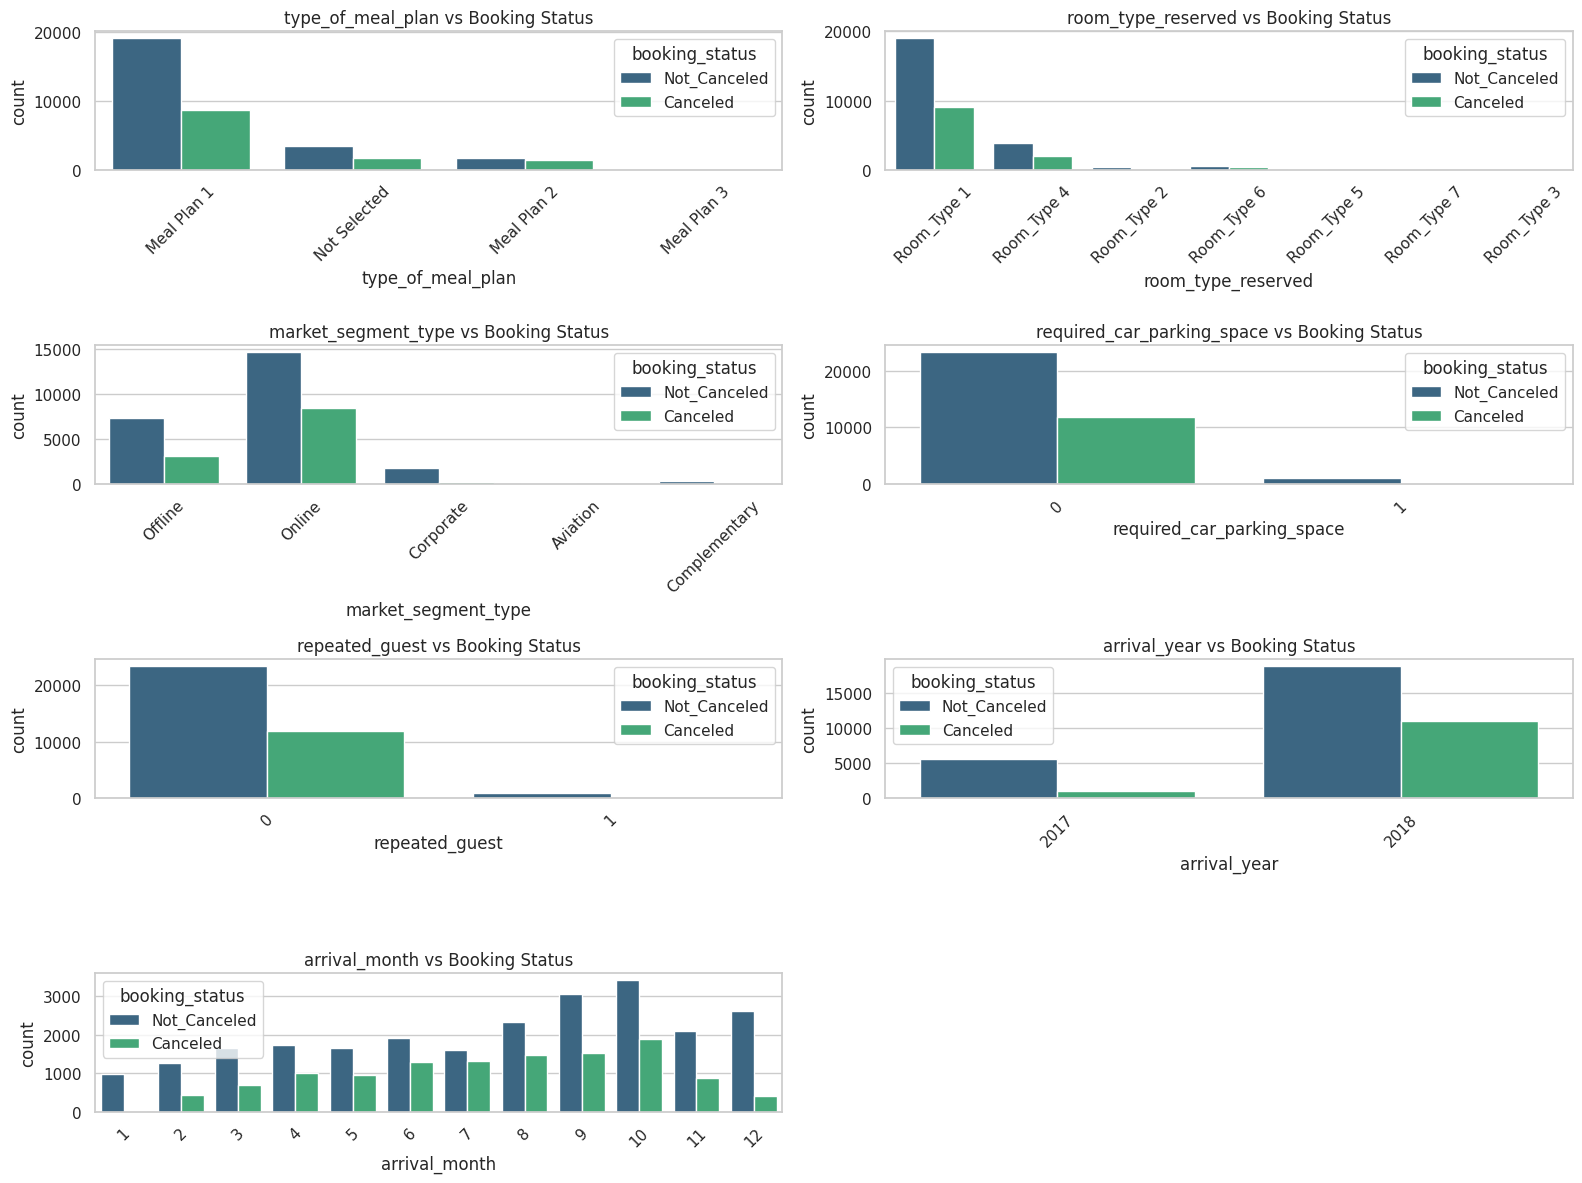

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate columns by type
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
            'required_car_parking_space', 'repeated_guest', 'arrival_year', 'arrival_month']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
            'no_of_week_nights', 'lead_time',
            'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
            'avg_price_per_room', 'no_of_special_requests']

# --- Plotting Categorical Features ---
plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='booking_status', palette='viridis')
    plt.title(f'{col} vs Booking Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Obesrvations**



*   ***The "Online" Risk Factor*** - The market_segment_type graph is arguably your most important one. Online bookings have a significantly higher ratio of cancellations compared to Offline or Corporate bookings. Corporate and Complementary segments have almost zero cancellations, suggesting these are highly reliable guests.


*   ***Seasonality and Trends*** - In Arrival Year There was a massive spike in bookings in 2018 compared to 2017. However, the proportion of cancellations also grew, meaning as volume increased, so did the "flakiness" of the reservations. In Arrival Month, notice the "hump" in the middle of the year (July–October). Cancellations seem to peak around October (Month 10). Interestingly, December (Month 12) has a very low cancellation rate relative to its total bookings, likely due to holiday plans being more "set in stone."


*   ***Guest Loyalty and Commitment*** - Guests who have stayed before (Value 1) almost never cancel. The vast majority of your cancellations come from new guests (Value 0). Guests who request a parking space (Value 1) have a near-zero cancellation rate. Requesting a parking spot is a strong "intent to show up" signal.

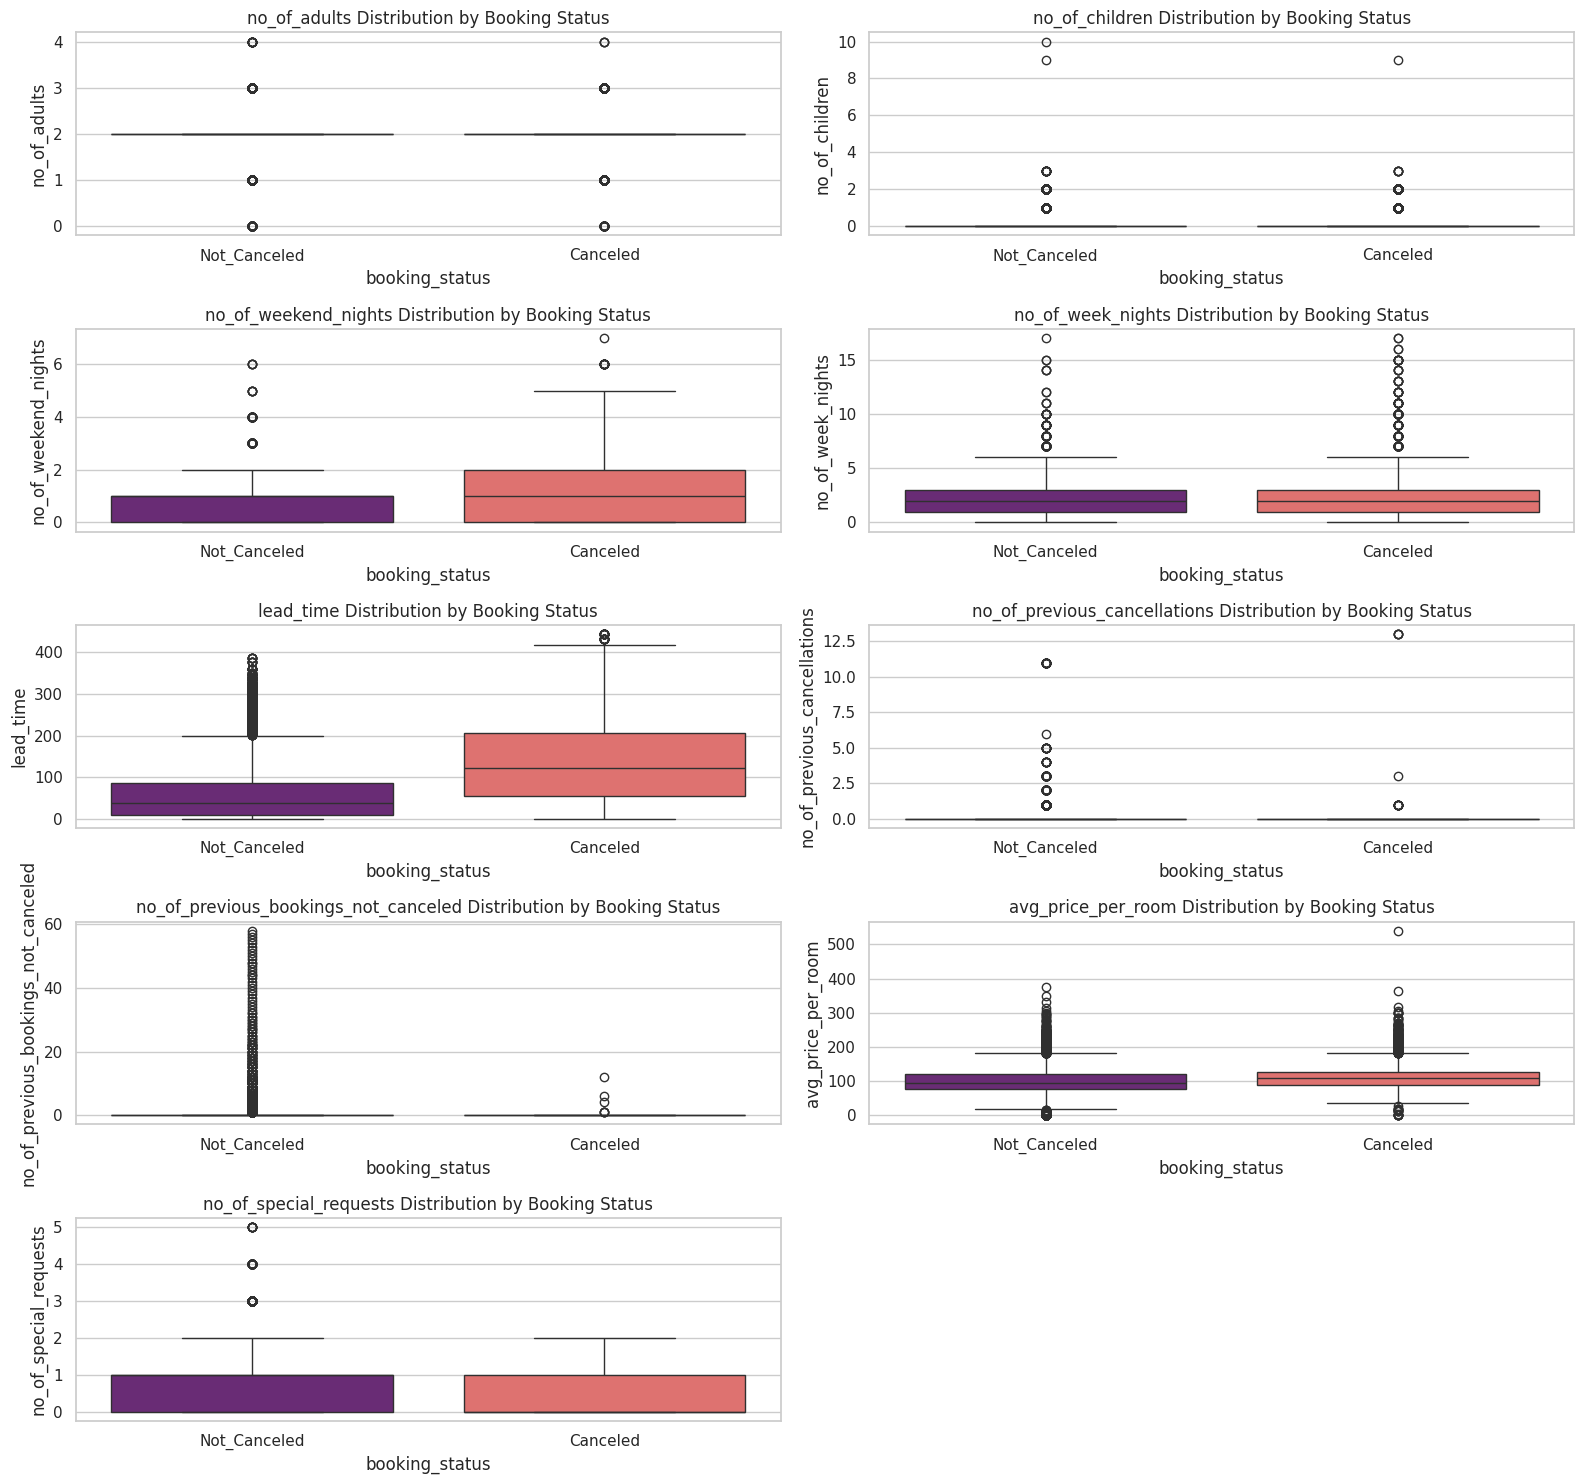

In [10]:
# --- Plotting Numerical Features (Boxplots to see distributions) ---
plt.figure(figsize=(16, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, x='booking_status', y=col, hue='booking_status', palette='magma')
    plt.title(f'{col} Distribution by Booking Status')
plt.tight_layout()
plt.show()

**Observations for numerical features -:**



*   ***Lead Time*** - This is the most significant differentiator. Canceled bookings have a much higher median lead time (roughly 120+ days) compared to those that were kept (well under 100 days). The longer the gap between booking and the stay, the higher the risk of cancellation.

*   ***Average Price per Room*** - Canceled bookings tend to have a slightly higher median price and a higher concentration of expensive rooms. High prices might make guests more likely to "shop around" and cancel if they find a better deal elsewhere.

*   ***Special Requests*** - There is a noticeable trend here. Guests who make fewer special requests are more likely to cancel. Conversely, those with 1 or more special requests (as seen in the purple "Not_Canceled" box) tend to follow through with their stay.

*   ***Weekend Nights*** - Canceled bookings show a slightly higher median for weekend stays. This suggests that leisure trips (which often involve weekends) might be more flighty or subject to change than weekday/business trips.

*   ***Previous Bookings & Cancellations*** - The "Not_Canceled" group has a massive amount of outliers for no_of_previous_bookings_not_canceled. This suggests that loyal, repeat customers almost never cancel. The no_of_previous_cancellations chart is mostly flat for both, but the presence of outliers in both categories suggests that while some "serial cancelers" exist, they aren't the primary driver of the overall cancellation rate.

*   ***No. of Adults/Children*** - The distribution is nearly identical. Whether a booking is for 1, 2, or 3 adults doesn't seem to impact the likelihood of cancellation in a meaningful way.

*   ***Week Nights*** - While the "Canceled" group has a slightly higher range of outliers, the medians are very similar to the kept bookings.

**Step 4 - Preprocessing & Feature Engineering**

In [11]:
# Label Encoding categorical columns
le = LabelEncoder()
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['booking_status'])

# Export to CSV the teain and test data
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

# Feature Selection: Defining Features (X) and Target (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Splitting dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 4 - Model Implementation and Evaluation**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, roc_auc_score)


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = []

for name, model in models.items():
    # Fit & Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC Score": roc_auc_score(y_test, y_proba),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    })

# Final Comparison Table
results_df = pd.DataFrame(results)
print("FINAL MODEL PERFORMANCE COMPARISON \n")
results_df

FINAL MODEL PERFORMANCE COMPARISON 



,Model,Accuracy,AUC Score,Precision,Recall,F1 Score,MCC
0,Logistic Regression,0.805651,0.857053,0.824654,0.899979,0.860672,0.547185
1,Decision Tree,0.869607,0.858741,0.905944,0.897706,0.901806,0.707872
2,K-Nearest Neighbor,0.849897,0.904370,0.875752,0.903079,0.889205,0.657478
3,Naive Bayes,0.445486,0.818218,0.934043,0.181442,0.303859,0.218619
4,Random Forest,0.903790,0.961180,0.911548,0.947716,0.929281,0.780471
5,XGBoost,0.892488,0.957055,0.901166,0.942137,0.921196,0.754177


**Observations -:**



*   ***Random Forest*** is a clear winner across almost every metric. Accuracy (0.9057) and F1 Score (0.9304) are the highest in the group, indicating it handles the balance between precision and recall exceptionally well. MCC (0.7852): The Matthews Correlation Coefficient is one of the best ways to measure the quality of binary classifications. A score this high suggests the model is performing very well.

*   ***XGBoost***  is a very close second. It trails Random Forest by a negligible margin, and its AUC Score (0.9570) proves it is highly capable of distinguishing between guests who will cancel and those who won't.

*   ***Naive Bayes*** has low accuracy and very low recall which means, when it says a reservation will be canceled, it's almost always right (High Precision), but it is missing the vast majority of actual cancellations (Low Recall).



**Saving all models as pkl files**

In [13]:
import joblib
import os

if not os.path.exists('model'):
    os.makedirs('model')

for name, model in models.items():
    filename = f"model/{name.replace(' ', '_')}.pkl"

    if name == "Random Forest":
        # Use high compression for the large Random Forest model
        # This helps get it under the GitHub 25MB web upload limit
        joblib.dump(model, filename, compress=3)
        print(f"Successfully saved (COMPRESSED): {filename}")
    else:
        # Save other models normally
        joblib.dump(model, filename)
        print(f"Successfully saved: {filename}")

# Saving scaler so it can be used for new data, the predictions will be wrong.
joblib.dump(scaler, 'model/standard_scaler.pkl')
print("Successfully saved: standard_scaler.pkl")

Successfully saved: model/Logistic_Regression.pkl
Successfully saved: model/Decision_Tree.pkl
Successfully saved: model/K-Nearest_Neighbor.pkl
Successfully saved: model/Naive_Bayes.pkl
Successfully saved (COMPRESSED): model/Random_Forest.pkl
Successfully saved: model/XGBoost.pkl
Successfully saved: standard_scaler.pkl
